# Milestone 2

## Introduction

We are going to analyze the dataset, cleanliness, blabla, start to explore the question.

ntm lucas

## Dataset overview

Size of dataset, blablabla

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
OPEN_FOOD_FACTS_PATH = 'data/en.openfoodfacts.org.products.csv'
food_facts_df = pd.read_csv(OPEN_FOOD_FACTS_PATH, delimiter='\t',low_memory=False)
food_facts_df.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Available fields

The dataset description is available [here](https://static.openfoodfacts.org/data/data-fields.txt).



This dataset is provided with a text file describing the different fields as follows :

* fields that end with _t are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)
* fields that end with _datetime are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ
* fields that end with _tags are comma separated list of tags (e.g. categories_tags is the set of normalized tags computer from the categories field)
* fields that end with a language 2 letter code (e.g. fr for French) is the set of tags in that language
* fields that end with _100g correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product
* fields that end with _serving correspond to the amount of a nutriment (in g, or kJ for energy) for 1 serving of the product

**TODO**: show data

### General cleaning 


Each product of the dataset has a field named `code`. This should be unique to each row:

In [3]:
print("We have {} rows in the dataset".format(food_facts_df.shape[0]))
print("We have {} different code in the dataset".format((np.unique(food_facts_df['code']).shape[0])))

We have 1051145 rows in the dataset
We have 1050979 different code in the dataset


Indeed, the code is unique for each row of the dataset except for a small number of duplicates. Let's check that. 

In [4]:
number_duplicates=food_facts_df['code'].duplicated()
print("We have {} duplicated code".format(number_duplicates.value_counts()[1]))

We have 166 duplicated code


Let's start by dropping these duplicated rows:

In [5]:
food_facts_df.drop_duplicates(subset=['code'],inplace=True)
print("We have {} rows in the dataset after dropping the duplicates.".format(food_facts_df.shape[0]))

We have 1050979 rows in the dataset after dropping the duplicates.


Great! We have now a unique code for each row. We can set the code as an index for the whole dataset.

In [6]:
#lets fix the code as indes 
food_facts_df.set_index('code', inplace=True)

In [7]:
food_facts_df.head(5)

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,NaN,...,NaN,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see from the 5 first rows in the dataset, the data is messy and has a huge number of NaNs. We need a huge data cleaning.

### Data completeness

Sparse dataset, lots of quasi empty columns (Lucas)

### Reliability of the dataset



The creators of each row of the dataset are provided as a field. Let's try to see who are the main contributors to this data before starting to analyze it.

In [8]:
## Computing the number of contributors
nb_contributors=food_facts_df['creator'].unique().shape[0]
print("We have overall {} contributors".format(nb_contributors))

We have overall 9654 contributors


Let's see how many contributions each creator has in the dataset

In [9]:
# Computing the contributions 
counts = food_facts_df['creator'].value_counts()
counts = counts.to_frame(name='counts')
counts['percentage'] = counts['counts']/food_facts_df.shape[0]

# Extracting only the top find and calculating the percentage of contribution
top_10 = round(sum(counts[0:10]['percentage']),2)*100
print("The 10 main", 'creators',"account for", top_10,"% of all contributions \n")
print(counts.head(10))

The 10 main creators account for 89.0 % of all contributions 

                            counts  percentage
kiliweb                     557567    0.530522
usda-ndb-import             169855    0.161616
openfoodfacts-contributors  118744    0.112984
elcoco                       26212    0.024941
date-limite-app              25438    0.024204
openfood-ch-import           11459    0.010903
sebleouf                     10140    0.009648
tacite                        8511    0.008098
tacinte                       5558    0.005288
waistline-app                 4511    0.004292


After googling these 10 main contributors we can easily identify them: 
* `kiliweb` represents the YUKA app (a French app aiming to compare the products based on different criterions).
* `usda` represnets United States Department of Agriculture. 
* `openfoodfacts-contributors` a bench of 20 main contributors.
* `data-limite-app` food application available for ios and androids users (French app).
* `Elcoco` also a food application (spanish app).
* `openfood-ch-import` seems to be openfood contributors from Switzerland.
* `sebleouf`, `tacite` , `tacinte` and `waistline-app` are unknown contributors. 

The first 6 sources of contributions seem to be reliable since we can clearly understand where the data comes from.

In [10]:
#Getting the top 6
top5_cont=counts.head(6).index

Since the first 6 editors have 85% of the total contributions and are reliable. We will base our analysis on their contributions.

In [11]:
reliable_facts_df=food_facts_df.loc[food_facts_df['creator'].isin([top5_cont[0],top5_cont[1],top5_cont[2],top5_cont[3],top5_cont[4],top5_cont[5]])]

In [12]:
print('There are {:,} rows '.format(reliable_facts_df.shape[0]) + 'and {} columns in our data'.format(reliable_facts_df.shape[1]))

There are 909,275 rows and 176 columns in our data


## Question 1: How do nutrients influence the selected nutrition scores?

The majority of the dataser fields are nutrients. We will try in this part to see their impact on the nutrition score. This analysis requires an additional cleaning of the dataset. 

### Additional cleaning

First, we will see the data type of each field: 

In [13]:
reliable_facts_df.dtypes

url                    object
creator                object
created_t               int64
created_datetime       object
last_modified_t         int64
                       ...   
choline_100g          float64
phylloquinone_100g    float64
beta-glucan_100g      float64
inositol_100g         float64
carnitine_100g        float64
Length: 176, dtype: object

We will discard all no-float fields since they cannot represent the nutrients. (ie:object)

In [14]:
reliable_facts_df = reliable_facts_df.select_dtypes(include=[np.float])

In [15]:
reliable_facts_df.columns

Index(['cities', 'allergens_en', 'serving_quantity', 'no_nutriments',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil', 'nova_group',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=119)

In [16]:
print('There are {:,} rows '.format(reliable_facts_df.shape[0]) + 'and {} columns left in our data'.format(reliable_facts_df.shape[1]))

There are 909,275 rows and 119 columns left in our data


Let us now analyze the level of completness for each editor

In [17]:
reliable_facts_df.head()

,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nova_group,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000000017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000003327986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00000000001111111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, our dataset has a huge number of NaNs. Dropping all of them will lead to an empty dataframe. 

#### Dealing with missing values
As an efficient strategy to deal with these missing values, we will first count the number of NaNs from the dataset and then remove the features where the number of missing values exceeds a certain threshold. 

Let's count the number of nans for each feature: 

In [18]:
nutrition_facts_df=reliable_facts_df.copy()

In [19]:
NaNs_distribution_series=nutrition_facts_df.isnull().sum().sort_values()
NaNs_distribution_series

energy_100g            171079
proteins_100g          172360
fat_100g               174227
carbohydrates_100g     174367
sugars_100g            183886
                        ...  
-mead-acid_100g        909275
-erucic-acid_100g      909275
-nervonic-acid_100g    909275
-caprylic-acid_100g    909275
cities                 909275
Length: 119, dtype: int64

Let us visualize the distribution of NaNs in the dataset

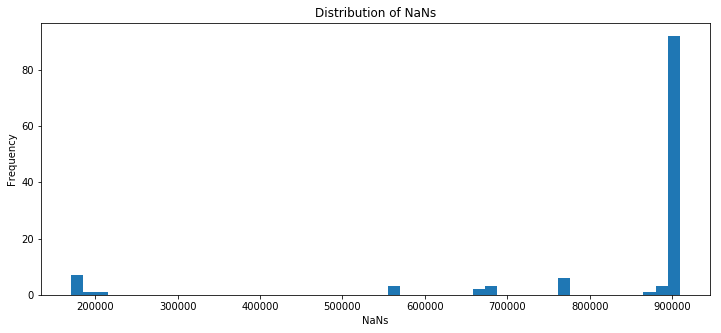

In [20]:
nutrition_facts_df.isnull().sum().plot(kind='hist', figsize=(12,5),bins=50)
plt.title('Distribution of NaNs')
plt.xlabel('NaNs')

plt.show()

Many columns have a huge number of missing values(More than 85 columns with 350000 NaNs), let's try to remove some of them by playing with the threshold value.   
We will plot the new distribution of NaNs. Our main objective is to remove this huge peak of frequency visualized in the plot above.   
We tune the threshold with a trial and error to have a satisfactory result. 

In [21]:
nutrition_facts_thresh_df = nutrition_facts_df.dropna(axis=1, thresh= len(nutrition_facts_df)*0.2,how='all')
nutrition_facts_thresh_df = nutrition_facts_thresh_df.dropna(axis=0, how='all')

print('There are now {:,} rows '.format(nutrition_facts_thresh_df.shape[0]) + 'and {} columns left in our data'.format(nutrition_facts_thresh_df.shape[1]))

There are now 753,337 rows and 17 columns left in our data


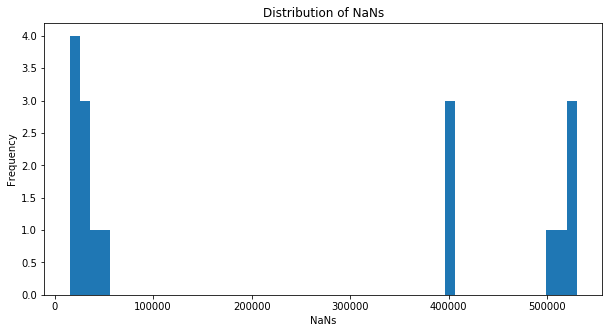

In [22]:
nutrition_facts_thresh_df.isnull().sum().plot(kind='hist', figsize=(10,5),bins=50)
plt.title('Distribution of NaNs')
plt.xlabel('NaNs')

plt.show()

We will se the total number of missing values for each field in the dataset after filtering them. 

In [23]:
nutrition_facts_thresh_df.isnull().sum().sort_values()

energy_100g                                 15141
proteins_100g                               16422
fat_100g                                    18289
carbohydrates_100g                          18429
sugars_100g                                 27948
salt_100g                                   29684
sodium_100g                                 29725
saturated-fat_100g                          42673
energy-kcal_100g                            49968
additives_n                                402635
ingredients_from_palm_oil_n                402635
ingredients_that_may_be_from_palm_oil_n    402635
fiber_100g                                 503950
nova_group                                 512394
serving_quantity                           529052
nutrition-score-fr_100g                    530078
nutrition-score-uk_100g                    530078
dtype: int64

In [24]:
print ("We have now {} of samples with {} fields".format(nutrition_facts_thresh_df.shape[0],
                                                         nutrition_facts_thresh_df.shape[1]))

We have now 753337 of samples with 17 fields


We think that this is the optimal way to decrease the number of NaNs in this dataset. Putting the threshold higher then the selected value will delete the nutrition score columns. 

After dealing with the missing values, let's check the statistics of our data. 

#### Looking at the stats!

In [25]:
nutrition_facts_thresh_df.describe()

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,2.242850e+05,350702.000000,350702.000000,350702.000000,240943.000000,7.033690e+05,7.381960e+05,735048.000000,710664.000000,734908.000000,725389.000000,249387.000000,736915.000000,723653.000000,723612.000000,223259.000000,223259.000000
mean,1.346306e+02,1.619067,0.025666,0.066187,3.663198,1.168606e+03,9.029525e+36,13.874774,5.253641,28.677263,14.280278,3.004989,8.468208,2.361525,0.945357,9.505400,9.298277
std,1.525221e+04,2.322212,0.160000,0.301945,0.773641,6.739273e+03,7.758017e+39,119.769869,10.920283,33.492672,24.566757,6.174345,35.631759,149.869319,59.950948,8.706922,9.196271
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000,-15.000000
25%,2.800000e+01,0.000000,0.000000,0.000000,4.000000,4.440000e+02,4.440000e+02,0.600000,0.100000,3.510000,0.700000,0.000000,1.100000,0.060000,0.024000,2.000000,1.000000
50%,4.300000e+01,1.000000,0.000000,0.000000,4.000000,1.125000e+03,1.117000e+03,7.000000,1.900000,15.660000,4.000000,1.500000,5.800000,0.530000,0.212000,10.000000,10.000000
75%,1.100000e+02,2.000000,0.000000,0.000000,4.000000,1.678000e+03,1.678000e+03,21.500000,7.500000,54.000000,20.550000,3.600000,12.000000,1.379220,0.551688,16.000000,17.000000
max,6.495676e+06,30.000000,3.000000,5.000000,4.000000,5.578665e+06,6.665559e+42,100000.111110,5555.000000,9292.000000,7520.000000,900.000000,22000.000000,101600.000000,40640.000000,40.000000,40.000000


Well, It seems that there is no difference between the `nutrition-score-fr_100g` and `nutrition-score-uk_100g`. Let's analyse that. 

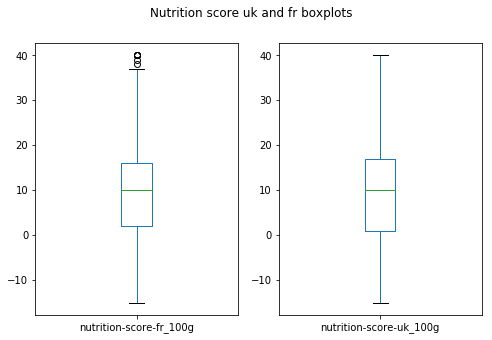

In [26]:
nutrition_facts_thresh_df[['nutrition-score-fr_100g','nutrition-score-uk_100g']].select_dtypes(include=float).plot(kind='box', subplots=True, title='Nutrition score uk and fr boxplots', figsize=(8,5))

plt.show()

As expected, the two scores has the same distribution except some outliers in the `nutrition-score-fr_100g`.

#### Dealing with outliers

Visualizing the stats. We see a huge number of outliers in the dataset after looking to min, max, mean and standard deviation of each feature.
All the ingredient features should have a reasonable value <=100g except the energy which is expressed in kJ. 

First, the column `serving_quantity` is not an ingredient. It can be dropped 

In [27]:
nutrition_facts_thresh_df=nutrition_facts_thresh_df.drop(columns=['serving_quantity'])

In [28]:
# storing the columns fields in a list
fields=list(nutrition_facts_thresh_df.columns)

Let us now remove the outliers. All nutrition feautres should have a value <=100g (except energy_100g)

In [29]:
nutrition_facts_clean_df= nutrition_facts_thresh_df[(nutrition_facts_thresh_df
                                                      [nutrition_facts_thresh_df.columns.difference(['energy_100g'])] <= 100.0).all(1)]


Negative values can not be possible. Except for the nutrition score that is by definition defined between -14 and 40 

In [30]:

nutrition_facts_clean_df = nutrition_facts_clean_df[(nutrition_facts_clean_df[nutrition_facts_clean_df.columns.difference(['nutrition_score_fr_100g', 'nutrition_score_uk_100g'])] >= 0).all(1)]

In [31]:
print("We have only {} rows left".format(nutrition_facts_clean_df.shape[0]))

We have only 1748 rows left


We lost a huge number of rows by removing the outliers. The dataset is highly corrupted in terms of ingredients.  We are going to see later if this number of samples is enough to have significant results. 

In [32]:
nutrition_facts_clean_df.head(10)

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,
00071604,1.0,0.0,0.0,4.0,29.0,29.0,0.10,0.1,1.100,1.100,0.100,0.200,0.10000,0.040000,2.0,0.0
0011110489579,5.0,0.0,0.0,4.0,0.0,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.01524,0.006096,0.0,0.0
0011110738448,2.0,0.0,0.0,4.0,8.0,8.0,0.00,0.0,0.000,0.000,0.000,0.420,0.97282,0.389128,4.0,4.0
0011110738462,0.0,0.0,0.0,4.0,8.0,8.0,0.00,0.0,0.420,0.420,0.000,0.000,0.77216,0.308864,3.0,3.0
0011110810014,0.0,0.0,0.0,3.0,71.0,71.0,0.00,0.0,3.330,0.000,3.300,0.000,1.60782,0.643128,4.0,4.0
0011110825872,1.0,0.0,0.0,3.0,59.0,59.0,0.00,0.0,2.110,0.000,0.700,0.700,0.08890,0.035560,0.0,0.0
0011110845931,4.0,0.0,0.0,4.0,69.6,69.6,1.25,0.0,0.833,0.417,0.417,0.417,0.19100,0.076200,0.0,0.0
0011110874399,0.0,0.0,0.0,4.0,8.0,8.0,0.00,0.0,0.420,0.420,0.000,0.000,0.80518,0.322072,3.0,3.0
0011110893291,0.0,0.0,0.0,3.0,0.0,0.0,0.00,0.0,0.000,0.000,0.000,0.000,3.05000,1.220000,10.0,10.0


We lost a huge number of rows but the dataset is now very clean !! 

### Data exploration

Now we have a clean dataset. Our strategy to find the impact of each variable on the nutrition score is the following: 

* 1) Correlation analysis between the variables 
* 2) Performing ordinary least square (OLS) regression using statsmodel 
* 3) Coefficient analysis


Before analyzing the impact of our variables on the nutrition score, we need to normalize our data by removing the mean and dividng by the standard deviation 

In [33]:
nutrition_facts_clean_df = nutrition_facts_clean_df.select_dtypes(include=float).transform(lambda x: (x - x.mean()) / x.std())

We can check now if the mean of our variables is close to zero and the standard deviation is close to 1. 

In [34]:
nutrition_facts_clean_df.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03
mean,2.543414e-16,1.112367e-15,-8.413052e-16,3.841321e-16,2.249662e-16,1.998147e-16,-4.090137e-16,-1.438907e-16,-1.898589e-16,3.103289e-16,1.042104e-15,-5.010929e-16,-4.404848e-16,1.871739e-15,5.551115e-17,3.252547e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.613039e-01,-8.311731e-02,-1.472095e-01,-2.380709e+00,-1.022623e+00,-1.014629e+00,-1.141023e-01,-1.222432e-01,-3.267985e-01,-3.247022e-01,-1.934493e-01,-1.856277e-01,-1.891762e-01,-1.891670e-01,-9.881935e-01,-5.272459e-01
25%,-8.613039e-01,-8.311731e-02,-1.472095e-01,-4.149654e-01,-1.022623e+00,-1.014629e+00,-1.141023e-01,-1.222432e-01,-3.267985e-01,-3.247022e-01,-1.934493e-01,-1.856277e-01,-1.891762e-01,-1.891670e-01,-9.881935e-01,-5.272459e-01
50%,-4.063147e-01,-8.311731e-02,-1.472095e-01,5.679066e-01,-4.564418e-01,-4.547819e-01,-1.141023e-01,-1.222432e-01,-2.482046e-01,-2.820822e-01,-1.934493e-01,-1.856277e-01,-1.854753e-01,-1.854663e-01,-4.303501e-01,-5.272459e-01
75%,5.036637e-01,-8.311731e-02,-1.472095e-01,5.679066e-01,9.994527e-01,9.848239e-01,-1.141023e-01,-1.222432e-01,5.196720e-02,1.483793e-01,-1.883977e-01,1.948857e-02,-1.010043e-01,-1.009816e-01,6.853369e-01,9.505379e-02
max,4.598567e+00,1.202430e+01,1.304880e+01,5.679066e-01,1.673478e+00,6.236719e+00,2.456213e+01,1.554943e+01,9.142343e+00,1.388195e+01,3.163161e+01,2.032600e+01,1.392052e+01,1.391979e+01,5.984850e+00,6.006901e+00


Great! our data is now ready for the analysis on the impact of our variables on the nutrition score.

Before doing so, let's see the correlation between variables visualized in a heatmap.

#### Correlation analysis

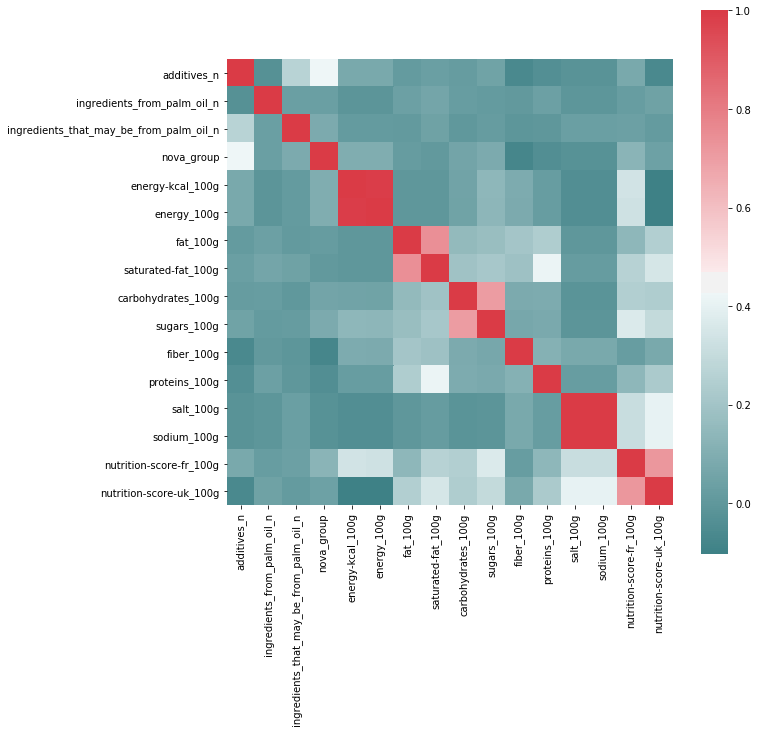

In [35]:
correlation_variables = nutrition_facts_clean_df.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(correlation_variables, mask=np.zeros_like(correlation_variables, dtype=np.bool),cmap=sns.diverging_palette(200, 10, as_cmap=True), square=True, ax=ax)

From the plot of correlation above we can confirm first that `nutrition-score-fr_100g` and `nutrition-score-uk_100g` are nearly the same.    
We can see also a  correlation equal to 1 between `sodium_100g` and `salt_100g`. This is why we will drop the column `sodium_100g` to avoid redundancy. 

In [36]:
#We drop sodium column. 
nutrition_facts_clean_df=nutrition_facts_clean_df.drop(columns=['sodium_100g'])
fields_left=nutrition_facts_clean_df.columns

In [37]:
#We drop one of the nutrition scores 
nutrition_facts_clean_df=nutrition_facts_clean_df.drop(columns=['nutrition-score-uk_100g'])


In [38]:
fields_left=nutrition_facts_clean_df.columns

Let's see the heatmap again. 

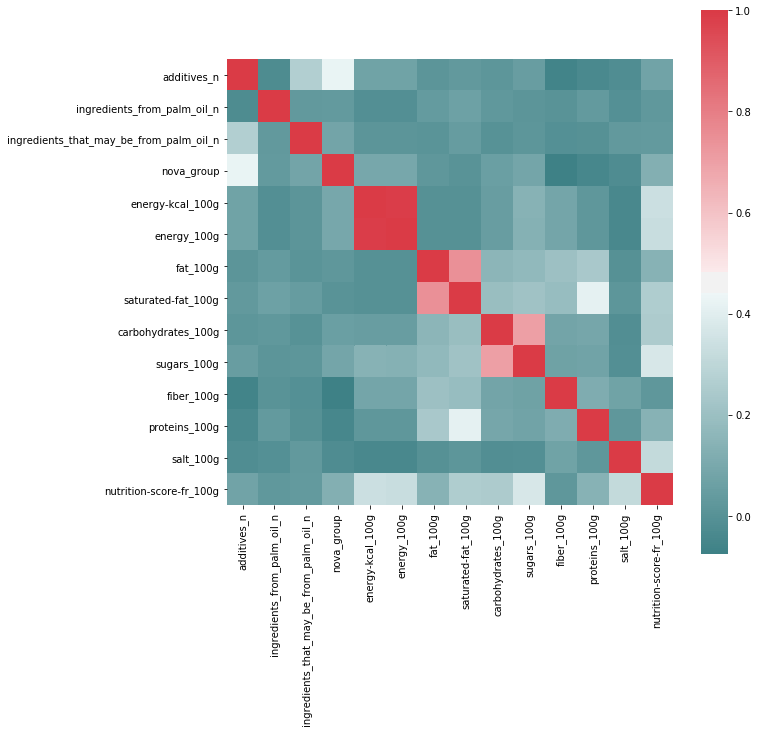

In [39]:
#calculating pearson correlation
correlation_variables = nutrition_facts_clean_df.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

#we draw the heatmap using seaborn
sns.heatmap(correlation_variables, mask=np.zeros_like(correlation_variables, dtype=np.bool),cmap=sns.diverging_palette(200, 10, as_cmap=True), square=True, ax=ax)

By looking at the heatmap, we can already see that `energey_100g`, `fat_100g`, `saturated_fat_100g` and `sugar_100g` have the highest correlation on the nutrition score.


Now everything is ready. What we want to do is to find the impact of each ingredient on the nutrition score. One way to do that is a regression. It allows us to see the impact of each variable on this score by looking to the weights. 

#### OLS Regression

Let's prepare our formula for the regression: 

We rename the columns by replacing '-' by '_'. This will allow us to create the formula for the statsmodel regression since'-' is interpreted as a math operation while defining the formula as a string. 

In [40]:
for field in fields: 
    nutrition_facts_clean_df = nutrition_facts_clean_df.rename(columns={field: field.replace('-','_')})
fields=nutrition_facts_clean_df.columns

In [41]:
nutrition_facts_clean_df.head()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,energy_kcal_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition_score_fr_100g
code,,,,,,,,,,,,,,
00071604,-0.406315,-0.083117,-0.147209,0.567907,-0.240754,-0.241507,-0.089426,-0.049011,-0.222638,-0.168429,-0.142933,-0.083070,-0.174606,-0.430350
0011110489579,1.413642,-0.083117,-0.147209,0.567907,-1.022623,-1.014629,-0.114102,-0.122243,-0.326798,-0.324702,-0.193449,-0.185628,-0.186956,-0.988194
0011110738448,0.048674,-0.083117,-0.147209,0.567907,-0.806935,-0.801354,-0.114102,-0.122243,-0.326798,-0.324702,-0.193449,0.029744,-0.047432,0.127493
0011110738462,-0.861304,-0.083117,-0.147209,0.567907,-0.806935,-0.801354,-0.114102,-0.122243,-0.287028,-0.265034,-0.193449,-0.185628,-0.076669,-0.151428
0011110810014,-0.861304,-0.083117,-0.147209,-0.414965,0.891609,0.878186,-0.114102,-0.122243,-0.011476,-0.324702,1.473577,-0.185628,0.045091,0.127493


In [42]:
fields_left

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nova_group',
       'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [43]:
# OLS regression formula 
fields_left=nutrition_facts_clean_df.columns
formula_string="nutrition_score_fr_100g ~ "
for field in fields_left[:-1]:
    formula_string=formula_string+field+"+"
formula_string=formula_string[:-1]
formula_string

'nutrition_score_fr_100g ~ additives_n+ingredients_from_palm_oil_n+ingredients_that_may_be_from_palm_oil_n+nova_group+energy_kcal_100g+energy_100g+fat_100g+saturated_fat_100g+carbohydrates_100g+sugars_100g+fiber_100g+proteins_100g+salt_100g'

In [44]:
nutrition_score_regression = sm.ols(formula= formula_string, data = nutrition_facts_clean_df)
res = nutrition_score_regression.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.382
Model:                                 OLS   Adj. R-squared:                  0.377
Method:                      Least Squares   F-statistic:                     82.47
Date:                     Sun, 24 Nov 2019   Prob (F-statistic):          1.45e-170
Time:                             20:54:29   Log-Likelihood:                -2059.1
No. Observations:                     1748   AIC:                             4146.
Df Residuals:                         1734   BIC:                             4223.
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

C:\Users\Thomas\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### Regression results 

Analysing the regression results from the coeficents of each ingredient, we can deduce the impact of these ingredients on the the nutrition score.  

#### Positive coef 
* `sugars_100g` has the highest positive impact nutrition score ~ 0.37  
* `saturated_fat_100g`has the fourth highest impact on nutrition socre ~ 0,36
* `energy_100` has the second highest nutrition score ~ 0.18 
* `fat_100g` with a coef ~ 0.16
* `salt_100g` with a coef ~ 0.16
* `nova_group`with a coef ~ 0.12


#### Negative coef 
* `fiber_100g` has the highest negative nutrition score ~-0.2 

#### Zero coef
* `ingredients_from_palm_oil_n ` , `additives_n  ` and `carbohydrates_100g` don't have any impact on the nutrition score 

From the french nutrition score datasheet page 24, we see that the highest the nutrition score is the lowest the nutritional quality is. We can then deduce that all products with a high percentage of energy, sugar, salt, and saturated fat all unhealthy and products with a high percentage of fiber are healthy. All other ingredients do not have a huge impact on the nutrition score.  
By analyzing the p-value we can deduce that our variables are statistically significant except the `ingredients_that_may_be_from_palm_oil_n`.    
The number of samples we have in hand after dropping the outliers and NaNs is enough to have significant results.

One of the features which seems to have a high impact on the nutrition score is the nova group. The values of this group are {1,2,3,4}

* Group 1 - Unprocessed or minimally processed foods :Unprocessed (or natural) foods are edible parts of plants (seeds, fruits, leaves, stems, roots) or of animals (muscle, offal, eggs, milk), and also fungi, algae and water, after separation from nature.
* Group 2 - Processed culinary ingredients : Processed culinary ingredients, such as oils, butter, sugar and salt, are substances derived from Group 1 foods or from nature by processes that include pressing, refining, grinding, milling and drying.
* Group 3 - Processed foods : Processed foods, such as bottled vegetables, canned fish, fruits in syrup, cheeses and freshly made breads, are made essentially by adding salt, oil, sugar or other substances from Group 2 to Group 1 foods. 
* Group 4 - Ultra-processed food and drink products: Ultra-processed foods, such as soft drinks, sweet or savoury packaged snacks, reconstituted meat products and pre-prepared frozen dishes.  

Beeing in a higher group leads also to a high nutrition score and then low nutritional quality.  

#### Conclusion

We can conclude that the analysis of the nutrients on the nutrition score is giving a satisfactory results. The main problem we encontered here is the missing values. We were forced to loose a huge number of rows and fetures from the dataset.  
We think that maybe some products don't contain some of the ingredients so the editor didn't  set the corresponding value to zero and thus added a missing value to the dataset. This can explain the huge number of missing values in the dataset. 

## Question 2: Comparing bio vs. normal products, is there a real difference in composition?

A lot of products claim to be bio. Different terms are used depending on the location (organic, bio, ...), but overall they all refer to the same fact that the product was mostly produced in compliance with the standards of [organic farming](https://en.wikipedia.org/wiki/Organic_farming). In the common knowledge, people often claim that organic or bio products are healthier than non-organic products.

In the upcoming analysis, we will try to investigate whether this statement is quantitavely true or if sometimes companies take advantage of the "bio" acronym to gain market shares.

We will conduct this analysis by investigating different columns of interest: 

* We have access to two different nutritional scores. We will try to investigate whether differences can be observed with respect to this column, i.e if bio/organic products tend to obtain better nutritional scores than standard products.
    - In addition, some bio products may obtain bad nutritional scores. We will try to pinpoint why some bio products would still get such bad scores.
    
    
* As stated above, organic products should undergo as little tratment as possible, inducing a more natural product. This should directly be represented by a lower capacity in additives. Hence as a first step we will assess whether there is a different in additives between bio and normal products.

### Data exploration

Let's see if we can separate the *bio/organic* products from the regular ones.

Some product contain words such as 'bio', 'biologic', 'organic' in their `product_name`, so this can be use to distinguish them from normal products. In addition, the dataset contains the columns `labels`, `labels_tags` and `labels_en`, which contain information about quality labels/certifications which also include bio products.

Thus, these columns can be used to split the dataset into 'bio' products and regular products. We will seach for keywords in these columns to determine if a product is bio:

In [45]:
bio_keywords = ['bio', 'organi'] # bio --> bio, biological, biologique, etc.; organi --> organic, organique

contains_bio_keywords = lambda x: any([(kw in str(x)) for kw in bio_keywords])

#food_facts_df.dropna(subset=['product_name'], inplace=True)

In [46]:
# Check for products matching the bio keywords in the 4 columns
bio_products = (food_facts_df['product_name'].apply(contains_bio_keywords)) \
             | (food_facts_df['labels'].apply(contains_bio_keywords)) \
             | (food_facts_df['labels_tags'].apply(contains_bio_keywords)) \
             | (food_facts_df['labels_en'].apply(contains_bio_keywords))

bio_df = food_facts_df[bio_products]

non_bio_df = food_facts_df[~bio_products]

print('There are {} bio products, and {} non-bio products.'.format(bio_df.shape[0], non_bio_df.shape[0]))
bio_df.head(5)

There are 74414 bio products, and 976565 non-bio products.


,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000001427,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1550231727,2019-02-15T11:55:27Z,1550231732,2019-02-15T11:55:32Z,Pain de maïs bio,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000429,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1567080029,2019-08-29T12:00:29Z,1567080749,2019-08-29T12:12:29Z,Jus de Pommes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000001011,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1568142714,2019-09-10T19:11:54Z,1568143389,2019-09-10T19:23:09Z,Fromage blanc fermier de chèvre au lait entier,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000014595,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1520321992,2018-03-06T07:39:52Z,1561463802,2019-06-25T11:56:42Z,Pâte de fruit fraise,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1545997008,2018-12-28T11:36:48Z,Organic Salted Nut Mix,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Nutritional score analysis

We now have a dataset split into bio and regular products, although the 2 categories are highly unbalanced. Let's analyze quickly if there is a difference in their nutritional score. The French nutritional score (`nutrition_grade_fr`) ranks the products from 'A' (best) to 'E' (worst) depending on their composition. so let's have a look at the relative distribution of those grades among the bio and regular products:

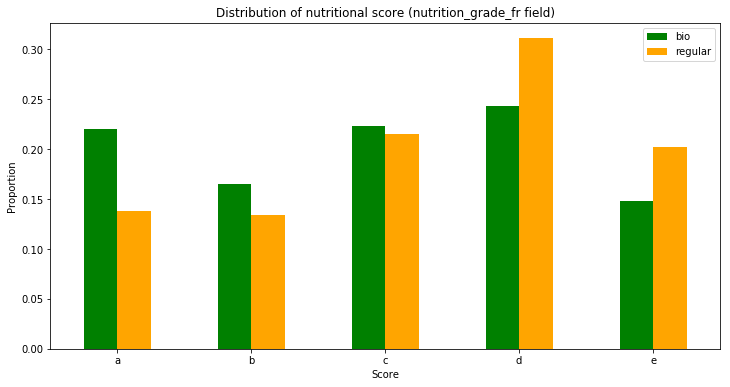

In [47]:
score_field = 'nutrition_grade_fr'

scores_df = pd.DataFrame([bio_df[score_field].value_counts(normalize=True).sort_index().rename('bio'),
             non_bio_df[score_field].value_counts(normalize=True).sort_index().rename('regular')])

scores_df = scores_df.transpose()

scores_df.plot(kind='bar', color=['green', 'orange'], rot=0, figsize=(12, 6))

plt.title('Distribution of nutritional score (nutrition_grade_fr field)')
plt.xlabel('Score')
plt.ylabel('Proportion')

plt.show()

There is a clear difference in the distribution of the nutritional score. The proportion of bio product with grade 'A' and 'B' is much higher than that of the regular products. Conversaly, there are less bio products with grade 'D' and 'E'. So overall, it seems that the bio products are healthier than the regular ones. 

There is another nutritional score indicated in the dataset, which is the UK one (`nutrition-score-uk_100g`). Let's see if the trend we observed is similar:

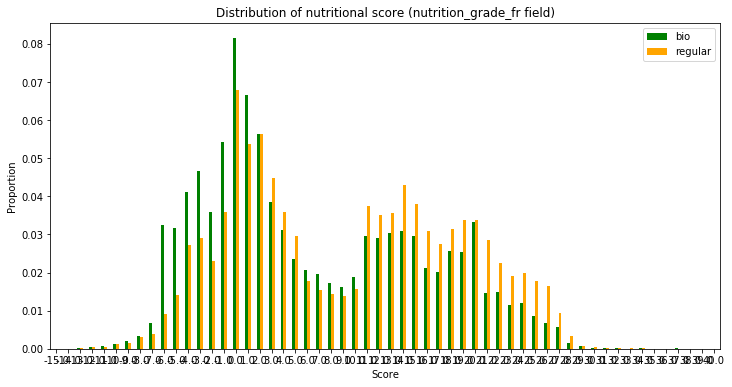

In [48]:
score_field = 'nutrition-score-uk_100g'

scores_df = pd.DataFrame([bio_df[score_field].value_counts(normalize=True).sort_index().rename('bio'),
             non_bio_df[score_field].value_counts(normalize=True).sort_index().rename('regular')])

scores_df = scores_df.transpose()

scores_df.plot(kind='bar', color=['green', 'orange'], rot=0, figsize=(12, 6))

plt.title('Distribution of nutritional score (nutrition_grade_fr field)')
plt.xlabel('Score')
plt.ylabel('Proportion')

plt.show()

The same observation can be made for the uk nutritional score (`nutrition-score-uk_100g`): the distribution of bio product shows that in proportion, they are more bio product that have a good nutritional score, and there are more regular products with a bad nutritional score.

### Results

We were able to separate products that are bio from the product that are not. Although we obtain two unbalanced sets of products, we obtained encouraging results, so we are going to keep investigating the question 'bio vs. regular products'.

### Additives analysis

First we extract the product_name and additives_tags columns for the bio and non-bio dataframes computed above.

In [49]:
bio_additives_df = bio_df[['product_name','additives_en']]
non_bio_additives_df = non_bio_df[['product_name','additives_en']]

In [50]:
bio_additives_df.head(10)

,product_name,additives_en
code,,
0000000001427,Pain de maïs bio,NaN
000000000429,Jus de Pommes,NaN
000000001011,Fromage blanc fermier de chèvre au lait entier,NaN
0000000014595,Pâte de fruit fraise,NaN
0000000016087,Organic Salted Nut Mix,NaN
0000000016094,Organic Polenta,NaN
0000000016117,Organic Long Grain White Rice,NaN
0000000016124,Organic Muesli,E307c - Alpha-tocopherol
0000000016193,Organic Dark Chocolate Minis,NaN


We remark that a lot of products do not contain any additives. One should be careful with this as this could be either that the product indeed does not contain any additives, or simply because the data is missing this information.

As we are trying to compare the different additives present in the bio and normal products and not quantizing how many products of these two categories contain additives, we can drop the rows not containing this information.

In [51]:
bio_additives_df = bio_additives_df.dropna()
non_bio_additives_df = non_bio_additives_df.dropna()
print("Length of bio dataset : {}\nLength of non-bio dataset : {}" .format(len(bio_additives_df), len(non_bio_additives_df)))

Length of bio dataset : 9569
Length of non-bio dataset : 234967


In [52]:
bio_additives_df.head()

,product_name,additives_en
code,,
0000000016124,Organic Muesli,E307c - Alpha-tocopherol
0000000018517,Seventh Heaven Organic Trail Mix,"E322 - Lecithins,E322i - Lecithin"
0000000035286,Organic Shoyu,E1510 - Ethanon
0000000035293,Organic Wheat-Free Tamari,E1510 - Ethanon
0002000000776,Fondant de saumon,"E336 - Potassium tartrates,E336i - Monopotassi..."


We observe a highly unbalanced dataset between products being organic and products not being organic. This will be taken into account for the upcoming analysis.

The additives_tags contains a string being a list. Let's process this column to enable a list representation, and then exploding this column to have a single element per row in this column.

In [53]:
bio_additives_df['additives_en'] = bio_additives_df['additives_en'].apply(lambda x: list(x.split(",")))
bio_additives_df_exploded = bio_additives_df.explode('additives_en')

non_bio_additives_df['additives_en'] = non_bio_additives_df['additives_en'].apply(lambda x: list(x.split(",")))
non_bio_additives_df_exploded = non_bio_additives_df.explode('additives_en')

In [54]:
bio_additives_df_exploded.head(10)

,product_name,additives_en
code,,
0000000016124,Organic Muesli,E307c - Alpha-tocopherol
0000000018517,Seventh Heaven Organic Trail Mix,E322 - Lecithins
0000000018517,Seventh Heaven Organic Trail Mix,E322i - Lecithin
0000000035286,Organic Shoyu,E1510 - Ethanon
0000000035293,Organic Wheat-Free Tamari,E1510 - Ethanon
0002000000776,Fondant de saumon,E336 - Potassium tartrates
0002000000776,Fondant de saumon,E336i - Monopotassium tartrate
0002000002466,2 MINI BAGUETTES SANS GLUTEN,E412 - Guar gum
0002000002466,2 MINI BAGUETTES SANS GLUTEN,E415 - Xanthan gum


In [55]:
bio_additives_df = bio_additives_df_exploded.groupby('additives_en') \
                                                     .count() \
                                                     .sort_values('product_name', ascending=False) \
                                                     .reset_index() \
                                                     .rename(columns={'additives_en' : 'additive', "product_name" : "count"})
    
non_bio_additives_df = non_bio_additives_df_exploded.groupby('additives_en') \
                                                             .count() \
                                                             .sort_values('product_name', ascending=False) \
                                                             .reset_index() \
                                                             .rename(columns={'additives_en' : 'additive', "product_name" : "count"})

First let's observe the 5 most used additive in Bio and non-Bio products, which is not biased by the unbalancing of the dataset.

In [56]:
most_used_bio = bio_additives_df['additive'][:5]
most_used_normal = non_bio_additives_df['additive'][:5]
print("The most used additives for bio products are : \n{} \n\n\n"
      "The most used additives for normal products are : \n{}" .format(most_used_bio, most_used_normal))

The most used additives for bio products are : 
0            E322 - Lecithins
1          E330 - Citric acid
2    E500 - Sodium carbonates
3              E440 - Pectins
4            E322i - Lecithin
Name: additive, dtype: object 


The most used additives for normal products are : 
0                              E330 - Citric acid
1                                E322 - Lecithins
2                                E322i - Lecithin
3                              E415 - Xanthan gum
4    E471 - Mono- and diglycerides of fatty acids
Name: additive, dtype: object


We already observe a difference from the top 5 used additives for bio product vs normal product. Let's try to visualize the global picture

First we compute the proportion of each additive in its own dataset

In [57]:
bio_additives_df['proportion'] = bio_additives_df['count'] / bio_additives_df['count'].sum()
non_bio_additives_df['proportion'] = non_bio_additives_df['count'] / non_bio_additives_df['count'].sum()

Let's observe the results, taking the normal products as a reference.

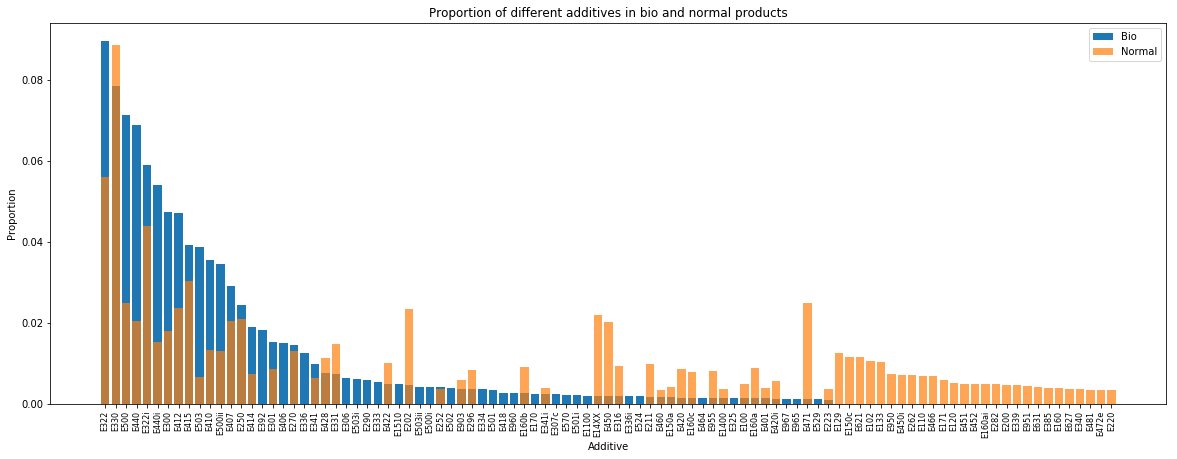

In [58]:
n_to_plot = 70

figure = plt.figure(figsize=(20,7))

additive_tag_bio = bio_additives_df.additive.apply(lambda x: x.split(" ")[0])
additive_tag_normal = non_bio_additives_df.additive.apply(lambda x: x.split(" ")[0])

plt.bar(additive_tag_bio[:n_to_plot], bio_additives_df.proportion[:n_to_plot], label='Bio')
plt.bar(additive_tag_normal[:n_to_plot], non_bio_additives_df.proportion[:n_to_plot], label='Normal', alpha=0.7)

plt.title('Proportion of different additives in bio and normal products')
plt.xlabel('Additive')
plt.ylabel('Proportion')
plt.legend()
plt.xticks(rotation = (90), fontsize = 8, va='top')
plt.show()

Many different analysis can be conducted from this graph.

* Let's analyze one of the spike present for the bio products and not for the normal products. One of the biggest is with the E440 and E440i additives. With a quick search online, we determine that this specific additive is [Pectin](https://en.wikipedia.org/wiki/Pectin). This specific additive is also used for [medicine](https://www.webmd.com/vitamins/ai/ingredientmono-500/pectin) and is hence not harmful at all.

* Another big peak present for bio products and not for normal products is with the E300 additive. Again, a quick search online revealed that this additive represent [ascorbic acid](https://www.webmd.com/drugs/2/drug-322/ascorbic-acid-vitamin-c-oral/details) and is known to be an antioxident, hence again not harmful at all.

* We observe that going down the most present additives, the normal products contains some additives that are not present at all in bio products. Let's observe some of them a bit deeper
    - Let's observe the E471 additive which is a big peak for the non-bio products. We found that this additive represent the Mono- and diglycerides of fatty acids. It was set not to be harmful but is still prohibited in biological food in the EU due to its source from fatty acids ([source in french](https://www.additifs-alimentaires.net/E471.php)). The presence of this additive in the dataset even if it is prohibited in the EU may be explained by the fact that it may not be prohibited in other countries, such as in the United States or also that some products may have had contacts to other non-bio products and hence have been contaminated with this additive.
    - E450 is another big peak for non-bio products and represents the Diphosphates and Pyrophosphates. These specific products are doubtful as the harmful dosages are not known ([source in french](https://additifs-alimentaires.net/E450.php)). This is hence the first additive which is known to be dangerous, and being present in normal products and not in bio products.

### Primary results

We observe that there is a significant difference in terms of present additives between the two categories of bio and non-bio products. This is encouraging for future work on the differentiation of these two categories. 
Here we presented a **non-exhaustive** list of the difference with respect to a few additives selected visually on the graph. Future work include the batch processing of such additives which are often represented by groups which are cited on [this](https://en.wikipedia.org/wiki/E_number) wikipedia page. Next steps is to produce a more robust analysis with respect to these groups

## Question 3: What are the levels of interdependencies between nations based on their production and importations?

### Additional cleaning

### Data exploration

### Results

quick conclusion, we **don't keep** the question, further investigations

## Complementary dataset

The Open Food Facts dataset is interesting and provides a lot of information about products that are sold in supermarkets. However, one of its limitations is that it mainly contains 'processed food', and no information on raw food such as fresh vegetables, fruits, etc.

For our investigations, we would like to have informations on such products, and hence need to find extra data. We came accross the [Ciqual nutritional composition table](https://www.data.gouv.fr/fr/datasets/table-de-composition-nutritionnelle-des-aliments-ciqual/), which is a dataset containing the composition of food and dishes. The dataset was created by a French certified public organism and the data it contains is very reliable. In particular, it contains the composition data for fruits and vegetables that we are interested in.

In [62]:
CIQUAL_DATASET_PATH = 'data/TableCiqual2017_ExcelFR_2017 11 17.xls'

ciqual_df = pd.read_excel(CIQUAL_DATASET_PATH)
ciqual_df.head(5)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_fr.1,"Energie, Règlement UE N° 1169/2011 (kcal/100g)",...,Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
0,1,101,0,entrées et plats composés,salades composées et crudités,-,25600,"Céleri rémoulade, préemballé","Céleri rémoulade, préemballé",-,...,-,-,"25,2","< 0,04","< 0,04","0,38","0,28","0,19",28,"< 0,08"
1,1,101,0,entrées et plats composés,salades composées et crudités,-,25601,"Salade de thon et légumes, appertisée, égouttée","Salade de thon et légumes, appertisée, égouttée",-,...,-,-,"2,75","< 0,04","0,053","4,45","< 0,16","0,29",31,"1,45"
2,1,101,0,entrées et plats composés,salades composées et crudités,-,25602,"Salade composée avec viande ou poisson, appert...","Salade composée avec viande ou poisson, appert...",-,...,"9,75",-,-,"0,032","0,022","4,13","0,2","0,12","11,1","1,23"
3,1,101,0,entrées et plats composés,salades composées et crudités,-,25605,Champignon à la grecque,Champignon à la grecque,-,...,-,-,"10,3","0,062","0,2","1,88","0,76","0,11","27,3","0,018"
4,1,101,0,entrées et plats composés,salades composées et crudités,-,25606,Salade de pommes de terre maison,Salade de pommes de terre maison,-,...,-,-,10,"0,077","0,06","0,89","0,53","0,14",7,0


The dataset has 3 categorical columns (`alim_grp_nom_fr`, `alim_ssgrp_nom_fr`, `alim_ssssgrp_nom_fr`) that can be used to easily extract the food we are interested in. For instance, if we want to keep only the vegetables:

In [63]:
vegetables_df = ciqual_df[ciqual_df['alim_ssgrp_nom_fr'] == 'légumes']
vegetables_df.head(5)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_fr.1,"Energie, Règlement UE N° 1169/2011 (kcal/100g)",...,Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
308,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,13004,"Avocat, pulpe, cru","Avocat, pulpe, cru",155,...,"14,5",-,"4,07","0,05","0,13","1,2","0,77","0,12","79,9",0
309,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20004,"Bette ou blette, crue","Bette ou blette, crue","12,3",...,"< 0,8",-,"3,08","< 0,015","0,015","< 0,1","0,2","0,036","24,7",0
310,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20009,"Carotte, crue","Carotte, crue","36,4",...,"13,8",-,"5,84","0,054","0,047","0,99","0,28","0,13","32,3",0
311,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20010,"Champignon, tout type, cru","Champignon, tout type, cru","21,6",...,0,-,"3,4","0,084","0,42","4,55","1,75","0,082",29,0
312,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20012,"Salade ou chicorée frisée, crue","Salade ou chicorée frisée, crue","22,7",...,298,-,"18,5","0,07","0,088","0,45","1,03","0,063",126,0


It is interesting to note that the vegetables are present in both in 'raw' and 'cooked' form (french: 'cuit' and 'cru'). As an example of what we could do with this dataset, let's analyse the differences in vitamins when cooking the vegetables differently:

In [64]:
# Separate raw and cooked vegetables
vegetables_raw_df = vegetables_df[vegetables_df['alim_ssssgrp_nom_fr'].str.contains('crus')]
vegetables_cooked_df = vegetables_df[vegetables_df['alim_ssssgrp_nom_fr'].str.contains('cuits')]

# Vitamin columns
vitamins_columns = vegetables_cooked_df.columns[vegetables_cooked_df.columns.str.contains('Vitamine')]

# Keep vitamins columns
vitamins_raw_df = vegetables_raw_df[vitamins_columns].copy()
vitamins_cooked_df = vegetables_cooked_df[vitamins_columns].copy()

We remove two columns that are almost empty for the remaining products and make sure the remaining fields are converted to float numbers:

In [65]:
# Remove almost empty columns
vitamins_raw_df.drop(columns=['Vitamine K2 (µg/100g)', 'Vitamine B12 (µg/100g)'], inplace=True)
vitamins_cooked_df.drop(columns=['Vitamine K2 (µg/100g)', 'Vitamine B12 (µg/100g)'], inplace=True)

def convert_to_float(value):
    try:
        if type(value) == float:
            return value
        
        float_value = float(value.replace(',', '.'))
        return float_value
    except ValueError:
        if value == '-':
            return 0.0
        else:
            numbers = re.findall( r'\d+\.*\d*', value)
            
            if numbers:
                return float(numbers[0])
            else:
                return 0.0

# Clean columns
vitamins_raw_df = vitamins_raw_df.applymap(convert_to_float)
vitamins_cooked_df = vitamins_cooked_df.applymap(convert_to_float)
vitamins_cooked_df.head(5)

,Vitamine D (µg/100g),Vitamine E (mg/100g),Vitamine K1 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g)
421,0.0,0.19,14.8,9.1,0.050,0.089,1.11,0.240,0.081,89.0
422,0.0,1.35,65.3,16.1,0.110,0.120,1.06,0.190,0.050,142.0
423,0.0,0.41,2.9,1.3,0.076,0.020,0.60,0.075,0.086,14.0
424,0.0,0.04,0.2,3.6,0.027,0.040,0.33,0.150,0.067,80.0
425,0.0,0.41,0.0,0.0,0.000,0.000,0.00,0.170,0.024,43.2


Now let's see the average quantity of each vitamins across all vegetables:

In [ ]:
vitamins_grouped_df = pd.DataFrame([vitamins_raw_df.mean().rename('raw'),
                                    vitamins_cooked_df.mean().rename('cooked')])

vitamins_grouped_df = vitamins_grouped_df.transpose()

vitamins_grouped_df.plot(kind='bar', color=['green', 'red'])

plt.title('Mean quantity of vitamins in vegetables')
plt.xlabel('Vitamin')
plt.ylabel('Quantity')

plt.show()

As a reminder, this is simply an example to illustrate this complementary and what we could get from it.

## Conclusion: proposed data story